# Clustering con Python y scikit-learn

## Primer clistering con sklearn

### Generación de los datos

In [1]:
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
x, y = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=[1,2.5,2,2], random_state=7)

In [5]:
df_blobs = pd.DataFrame({
    "x1": x[:,0],
    "x2": x[:,1],
    "y": y
})

In [7]:
df_blobs.head()

,x1,x2,y
0,-4.819224,5.723364,1
1,-1.836238,-7.735384,3
2,-7.456176,6.198874,0
3,-2.153862,-0.296621,1
4,-10.124910,6.133805,0


In [29]:
def plot_2d_clusters(x, y, ax):
    y_uniques = pd.Series(y).unique()

    for i in y_uniques:
        x[y==i].plot(
            title= f'{len(y_uniques)} Clusters',
            kind="scatter",
            x="x1",
            y="x2",
            marker=f'${i}$',
            ax=ax
        )

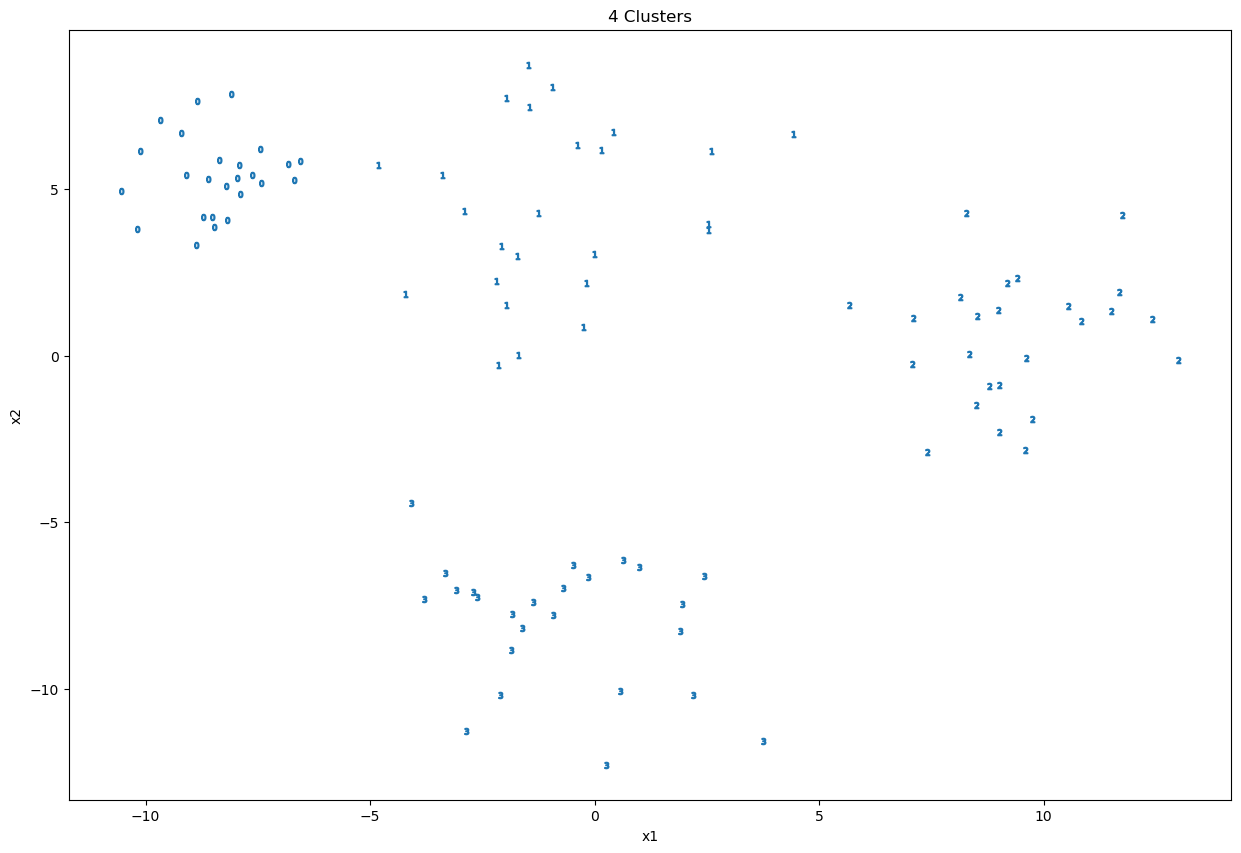

In [30]:
fig, ax = plt.subplots(1, 1 , figsize=(15, 10))
x, y = df_blobs[["x1", "x2"]], df_blobs["y"]
plot_2d_clusters(x, y, ax)

### Aplicando clustering

In [31]:
from sklearn.cluster import KMeans

In [33]:
kmeans = KMeans(n_clusters=4,random_state =7)

In [34]:
# entrenamiento
y_pred = kmeans.fit_predict(x)

In [35]:
y_pred

array([0, 3, 0, 2, 0, 2, 3, 1, 0, 3, 3, 1, 3, 0, 2, 3, 3, 1, 3, 0, 2, 0,
       0, 3, 1, 0, 1, 1, 3, 2, 3, 3, 2, 3, 3, 0, 1, 0, 2, 0, 3, 2, 2, 1,
       2, 1, 0, 0, 1, 0, 1, 3, 1, 3, 2, 0, 2, 3, 2, 2, 2, 3, 2, 1, 0, 1,
       0, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 3, 2, 2, 2, 0, 3, 1, 3, 1, 0,
       0, 2, 3, 2, 0, 3, 1, 1, 3, 2, 0, 2])

Text(0.5, 1.0, 'KMeans {axs[1].get_title()}')

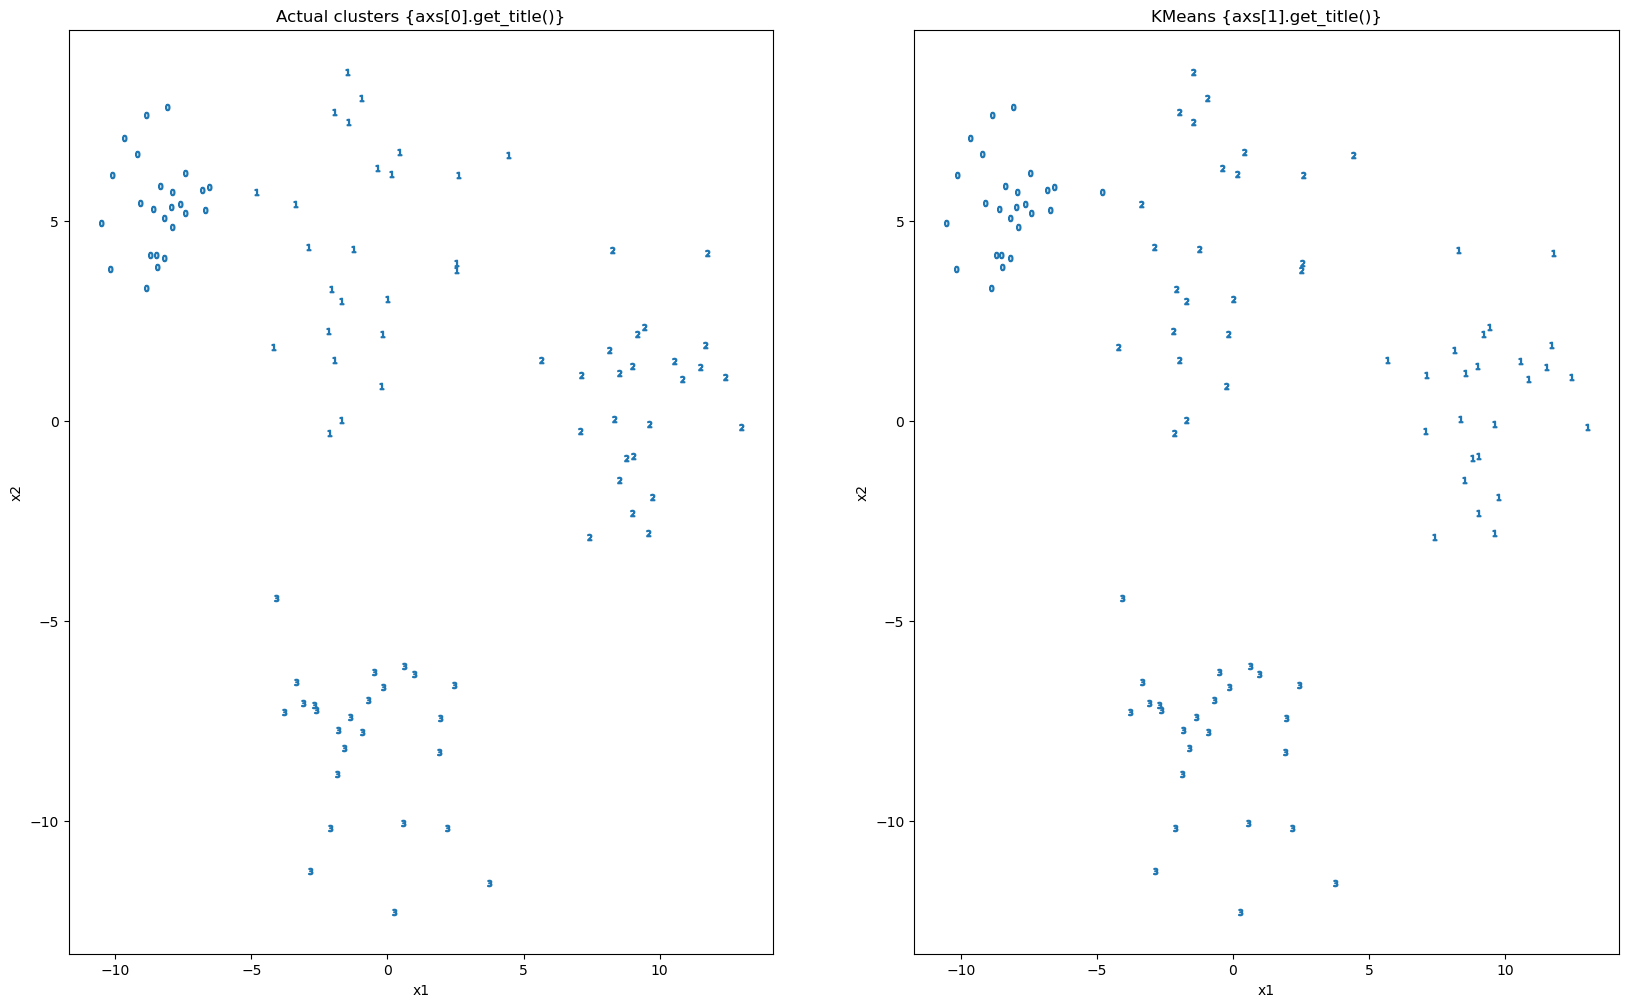

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(20,12))
plot_2d_clusters(x, y, ax[0])
plot_2d_clusters(x, y_pred, ax[1])

ax[0].set_title("Actual clusters {axs[0].get_title()}")
ax[1].set_title("KMeans {axs[1].get_title()}")

## Evaluación del modelo de clustering

### Coeficiente de silueta

$$
s(i) = \frac{b-a}{max(a, b)}
$$

Donde:

$a$ es promedio de distancias de la observacion $i$ con las otras observaciones de su cluster.

$b$ es la distancia minima a otro cluster que no esta $i$

<img src="img/silueta.png">

Cuanto mayor el valor de silueta más se diferencian los puntos de un cluster. Debe dar mayo a 0 el promedio de los valores de silueta (en la figura da 0.6)

## K-means

- se debe indicar cantidad de cluster, k
- ubicar centroides aleatorios
- cada punto se asigna al centroide más cercano
- recalcular centroides con el promedio
- repetir pasos hasta que no se muevan los centroides

$$
J = \sum_{j=1}^{k}\sum_{i=1}^{n} \quad \big\| x_{i}^{(j)} - c_{j} \big\|^{2}
$$

Donde:

- $k$, numero de clusters
- $n$, numero de casos
- $x_{i}$ caso particualar
- $c_{j}$ centroide del cluster $j$

In [39]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#from yellowbrick.cluster import SilhoutteVisualizer

### Preparando los datos

In [48]:
x, y, c = make_blobs(500, cluster_std= 0.8, centers=4, n_features=2, return_centers=True, random_state=7)

In [49]:
df_blobs = pd.DataFrame({
    "x1": x[:,0],
    "x2": x[:,1],
    "y":y
})

In [50]:
df_centers =  pd.DataFrame({
    "x1": c[:,0],
    "x2": c[:,1]
})

### Visualización de datos

<AxesSubplot:xlabel='x1', ylabel='x2'>

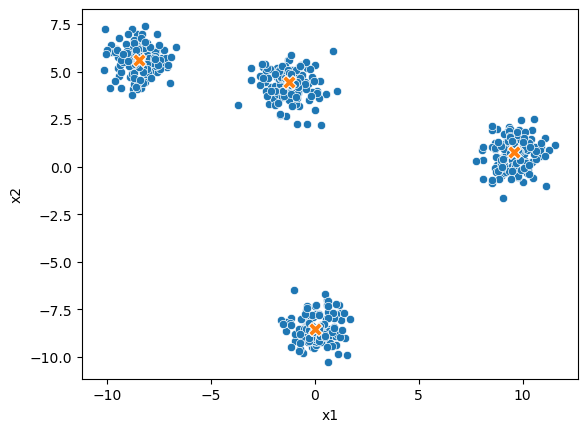

In [51]:
sns.scatterplot(data=df_blobs, x="x1", y="x2")
sns.scatterplot(data=df_centers, x="x1", y="x2", marker="X", s=100)

### Aplicando k-means

In [54]:
kmeans = KMeans(n_clusters=3)
df_cluster = kmeans.fit_predict(x)
df_blobs["cluster"] = df_cluster
k_means_centers = kmeans.cluster_centers_
df_k_means_center = pd.DataFrame(
    {
        "x1": k_means_centers[:,0],
        "x2": k_means_centers[:,1]
    }
) 

<AxesSubplot:xlabel='x1', ylabel='x2'>

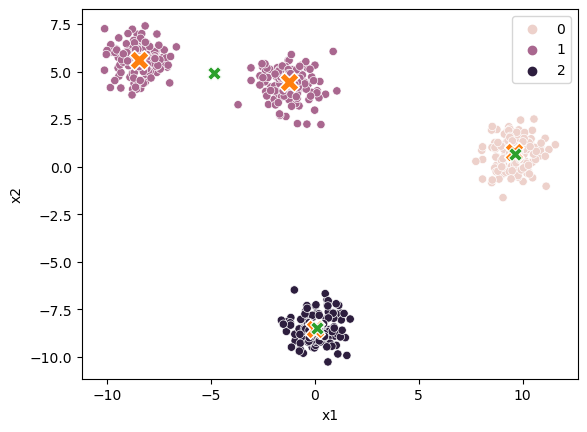

In [59]:
sns.scatterplot(data=df_blobs, x="x1", y="x2", hue="cluster")
sns.scatterplot(data=df_centers, x="x1", y="x2", marker="X", s=200)
sns.scatterplot(data=df_k_means_center, x="x1", y="x2", marker="X", s=100)

Para determinar el número de clusters a asignar un método puede ser el Método del codo (Elbow):

WCSS(Within-Cluster Sum of Square)

$$
WCSS(C_{j})= \sum_{p_{i}=1  \epsilon  C_{j}}^{p_{m}} distance(C_{j}, p_{i})^2
$$

Además se puede usar el coeficiente de silueta variando k

In [62]:
def vis_cluster(k):
    kmeans = KMeans(n_clusters=k)
    df_cluster = kmeans.fit_predict(x)
    df_blobs["cluster"] = df_cluster
    k_means_centers = kmeans.cluster_centers_
    df_k_means_center = pd.DataFrame(
        {
            "x1": k_means_centers[:,0],
            "x2": k_means_centers[:,1]
        }
    ) 

    fig = plt.figure(figsize=(9,9))
    sns.scatterplot(data=df_blobs, x="x1", y="x2", hue="cluster")
    sns.scatterplot(data=df_centers, x="x1", y="x2", marker="X", s=200)
    sns.scatterplot(data=df_k_means_center, x="x1", y="x2", marker="X", s=100)
    plt.show()

3


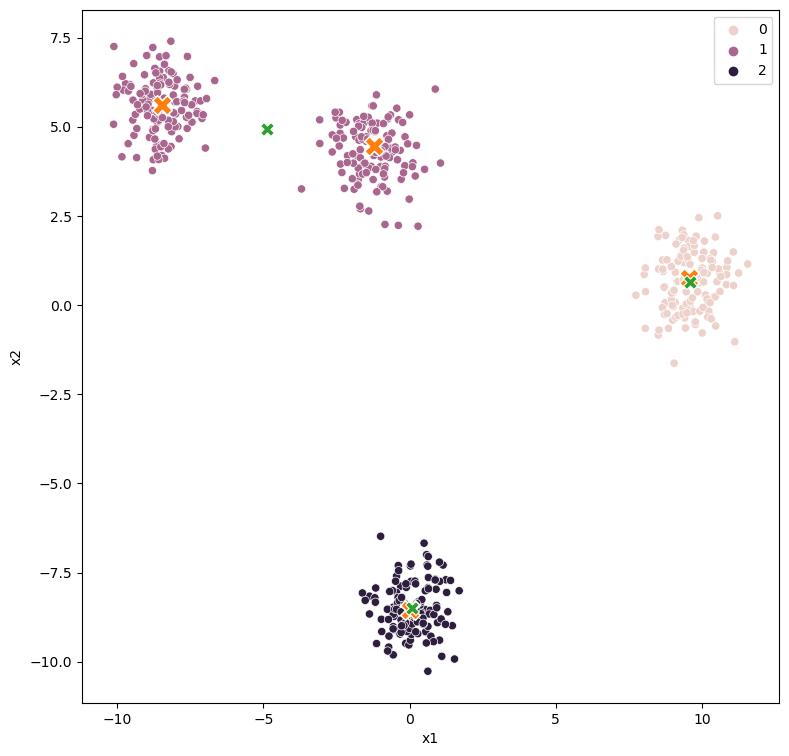

4


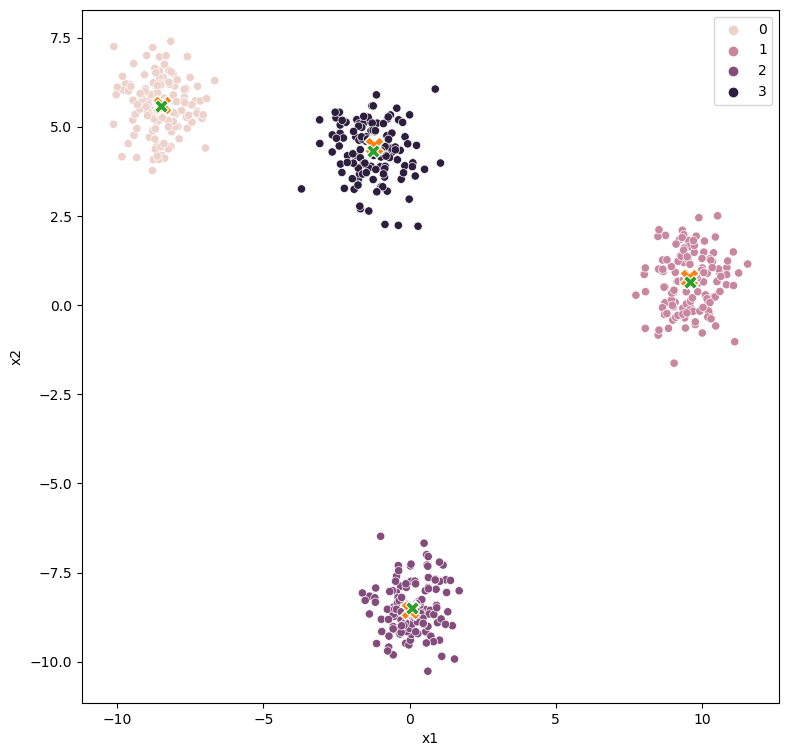

5


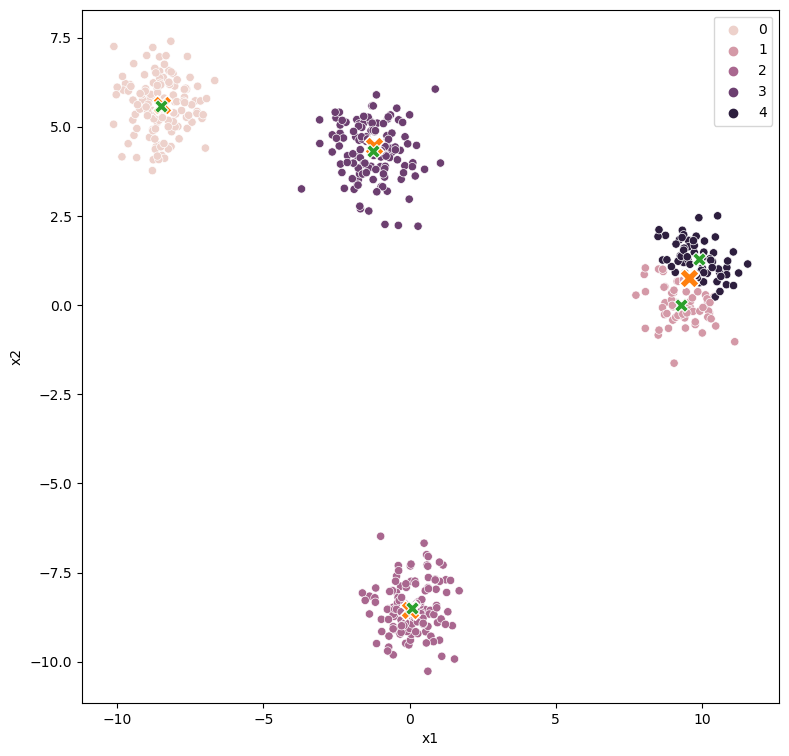

6


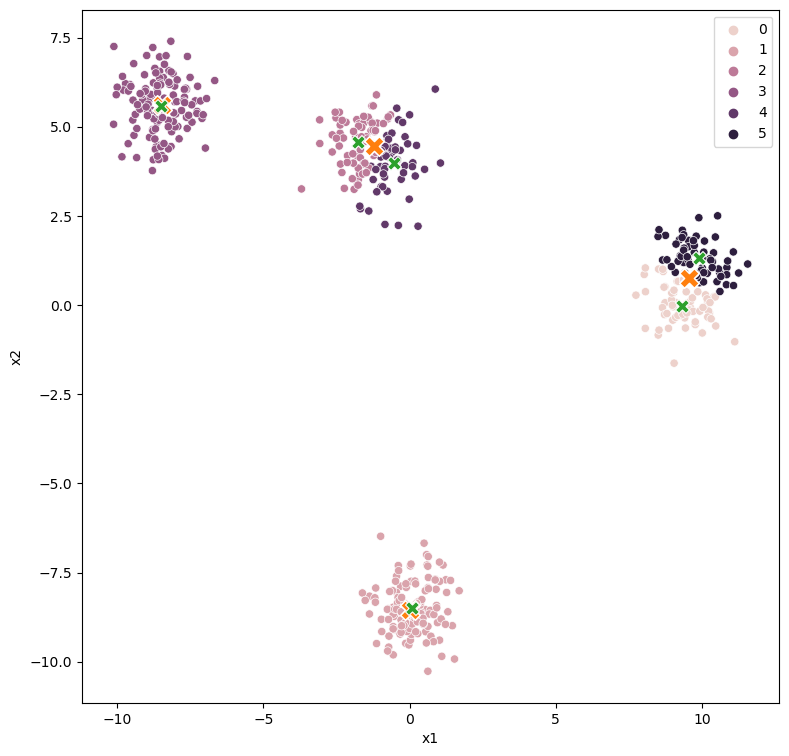

In [63]:
for _ in range(3, 7):
    print(_)
    vis_cluster(_)

Text(0, 0.5, 'Inertia')

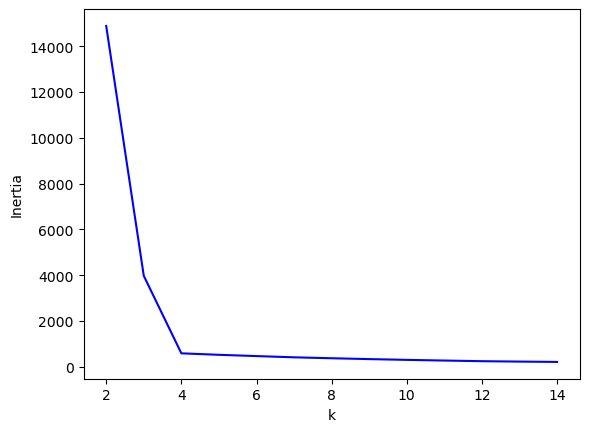

In [67]:
sum_of_squared_distances = []
K = range(2, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(x)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, "b-")
plt.xlabel("k")
plt.ylabel("Inertia")

Text(0, 0.5, 'silhouette_scores')

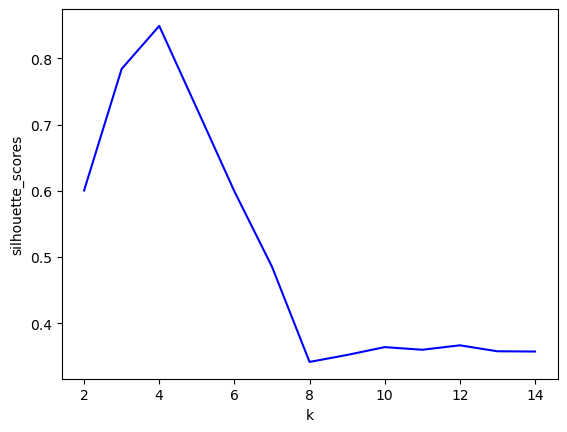

In [71]:
silhouette_scores = []
K = range(2, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(x)
    y = km.predict(x)
    silhouette_scores.append(silhouette_score(x, y))

plt.plot(K, silhouette_scores, "b-")
plt.xlabel("k")
plt.ylabel("silhouette_scores")